In [224]:
import numpy as np
import astropy
import astropy.io.fits as pyfits
from astropy.table import Table, join
from astropy.io import ascii
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.wcs import WCS
#! pip install aplpy
import aplpy

import os, sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
#sys.path.append('/Users/nessmayker/Desktop/PythonFunctions')

SNe_Gal_File = '../Data/3.SNe+GalData.csv'
database = Table.read(SNe_Gal_File, format='csv') 
for i in range(len(database)):
    print(database["SN_name"][i], database["SN_percentile_2"][i])

ASASSN-14ha 0.98
SN1901B 0.56
SN1923A 0.39
SN1926A non-detection
SN1935C 0.1
SN1940E 0.99
SN1950B 0.99
SN1957D 0.96
SN1959E 0.92
SN1960F non-detection
SN1961I non-detection
SN1964F non-detection
SN1967H 0.82
SN1968L 1.0
SN1972Q 0.17
SN1973R 0.7
SN1979C non-detection
SN1981B non-detection
SN1983N 0.21
SN1983V 0.24
SN1984J 0.84
SN1985P non-detection
SN1986G 0.65
SN1986I 0.75
SN1986L non-detection
SN1988M --
non-detection --
SN1989B 0.9
SN1992bd 0.99
SN1993Z non-detection
SN1995V 0.9
SN1996cr 0.98
SN1997bs 0.43
SN1999em 0.76
SN1999eu --
non-detection --
SN1999gn 0.43
SN2001du non-detection
SN2003jg 1.0
SN2005at 0.8
SN2005df --
non-detection --
SN2006X non-detection
SN2006ov non-detection
SN2007it 0.44
SN2008bk non-detection
SN2008eh 0.93
SN2009hd 0.99
SN2009ib 0.31
SN2010el 0.84
SN2011ja 0.93
SN2012A --
non-detection --
SN2012cg non-detection
SN2012fr non-detection
SN2013ej non-detection
SN2014L 0.98
SN2014dt non-detection
SN2016adj 0.95
SN2016cok 0.4
SN2019ehk non-detection
SN2019krl non

In [201]:
# p = database["SN_percentile"]
# for i in range(len(p)):
#     if p[i] != False:
#         better = p[i][1:-1]
#         print(better)
#        # better = round(float(better),3)
#         p[i] = better
#     else:
#         p[i] = "non-detection"
for i in range(len(database)):
    print(database["SN_percentile_2"][i])

0.98
0.56
0.39
non-detection
0.1
0.99
0.99
0.96
0.92
non-detection
non-detection
non-detection
0.82
1.0
0.17
0.7
non-detection
non-detection
0.21
0.24
0.84
non-detection
0.65
0.75
non-detection
--
--
0.9
0.99
non-detection
0.9
0.98
0.43
0.76
--
--
0.43
non-detection
1.0
0.8
--
--
non-detection
non-detection
0.44
non-detection
0.93
0.99
0.31
0.84
0.93
--
--
non-detection
non-detection
non-detection
0.98
non-detection
0.95
0.4
non-detection
non-detection
non-detection
non-detection
0.75
0.93


In [218]:

gal_groups = database.group_by('galaxy')
gals = gal_groups.groups.keys[4:]
indices = gal_groups.groups.indices[4:]
indices = indices.tolist()
indices.append(0)

print(indices)
print(gal_groups["SN_name"][4])

images, name, types, ras, decs, percentiles = [],[],[],[],[],[]
for i in range(len(indices)-2):
    SNnames, SNtypes, SNras, SNdecs, SNpercentiles = [],[],[],[],[]
    images.append(gal_groups["ImageFile150"][indices[i]])
    SNnames.append(gal_groups["SN_name"][indices[i]])
    SNtypes.append(gal_groups["SN_type"][indices[i]])
    SNras.append(gal_groups["SN_ra"][indices[i]])
    SNdecs.append(gal_groups["SN_dec"][indices[i]])
    SNpercentiles.append(gal_groups["SN_percentile_2"][indices[i]])
    j = 1
    while(indices[i] + j < indicies[i+1]):
        SNnames.append(gal_groups["SN_name"][indices[i]+j])
        SNtypes.append(gal_groups["SN_type"][indices[i]+j])
        SNras.append(gal_groups["SN_ra"][indices[i]+j])
        SNdecs.append(gal_groups["SN_dec"][indices[i]+j])
        SNpercentiles.append(gal_groups["SN_percentile_2"][indices[i]+j])
        j += 1
    name.append(SNnames)
    types.append(SNtypes)
    ras.append(SNras)
    decs.append(SNdecs)
    percentiles.append(SNpercentiles)
    
  

[4, 5, 6, 7, 9, 10, 12, 15, 16, 17, 21, 23, 24, 25, 27, 28, 33, 37, 44, 50, 51, 52, 54, 55, 56, 58, 63, 64, 65, 66, 0]
SN1996cr
0.98
0.99
non-detection
non-detection
non-detection
0.9
0.99
--
0.24
non-detection
non-detection
non-detection
0.1
0.84
non-detection
--
0.31
0.98
0.84
0.76
non-detection
1.0
0.93
--
0.7
0.9
0.43
0.99
0.4
0.82
0.17
0.75
0.98
non-detection
non-detection
non-detection
0.43
non-detection
non-detection
non-detection
0.56
0.92
non-detection
non-detection
non-detection
0.93
non-detection
0.75
non-detection
--
non-detection
0.93
0.65
0.95
0.39
0.99
0.96
1.0
0.21
0.44
0.8
non-detection


In [203]:
import matplotlib.pyplot as plt
plots, wcss = [],[]

for i in range(len(gals)):
    if os.path.isfile(images[i]):
        co_hdu = pyfits.open(images[i])
        co_map = co_hdu[0].data
        plots.append(co_map)
        wcss.append(WCS(co_hdu[0].header, naxis=2))



In [238]:
#print(name)
percentiles = [['0.98'], ['0.99'], ['non-detection'], ['non-detection', 'non-detection'], ['0.9'], ['0.99', 'non-detection'], ['0.24', 'non-detection', 'non-detection'], ['non-detection'], ['0.1'], ['0.84', 'non-detection', 'non-detection', '0.31'], ['0.98', '0.84'], ['0.76'], ['non-detection'], ['1.0', '0.93'], ['non-detection'], ['0.7', '0.9', '0.43', '0.99', '0.4'], ['0.82', '0.17', '0.75', '0.98'], ['non-detection', 'non-detection', 'non-detection', '0.43', 'non-detection', 'non-detection', 'non-detection'], ['0.56', '0.92', 'non-detection', 'non-detection', 'non-detection', '0.93'], ['non-detection'], ['0.75'], ['non-detection', 'non-detection'], ['non-detection'], ['0.93'], ['0.65', '0.95'], ['0.39', '0.99', '0.96', '1.0', '0.21'], ['0.44'], ['0.8'], ['non-detection']]

In [239]:
legendLabels = []

for i in range(len(name)):
    legendlabel = []
    if len(name[i]) > 1:
        for k in range(len(name[i])):  
            percen = percentiles[i][k]
            per = str(percen)
            label = name[i][k] + " " + types[i][k] + " " + str(percentiles[i][k])
            legendlabel.append(label)
    else:
        #print(name[i][0], types[i][0], percentiles[i][0])
        legendlabel.append(name[i][0] + " " + types[i][0] + " " + str(percentiles[i][0]))
    legendLabels.append(legendlabel)
print(legendLabels)

[['SN1996cr II 0.98'], ['SN1940E I 0.99'], ['SN2019qyl IIn/LBV non-detection'], ['SN2013ej II non-detection', 'SN2019krl IIn/LBV non-detection'], ['SN1995V II 0.9'], ['SN1992bd II 0.99', 'SN1999eu II non-detection'], ['SN1983V Ic 0.24', 'SN2001du II non-detection', 'SN2012fr Ia non-detection'], ['SN1985P II non-detection'], ['SN1935C unclassified 0.1'], ['SN1984J II 0.84', 'SN1986L II non-detection', 'SN2005df Ia non-detection', 'SN2009ib II 0.31'], ['ASASSN-14ha II 0.98', 'SN2010el Ia 0.84'], ['SN1999em II 0.76'], ['SN1993Z Ia non-detection'], ['SN2003jg Ic 1.0', 'SN2008eh unclassified 0.93'], ['SN2012A II non-detection'], ['SN1973R II 0.7', 'SN1989B Ia 0.9', 'SN1997bs IIn 0.43', 'SN2009hd II 0.99', 'SN2016cok II 0.4'], ['SN1967H II 0.82', 'SN1972Q II 0.17', 'SN1986I II 0.75', 'SN2014L Ic 0.98'], ['SN1926A II non-detection', 'SN1961I II non-detection', 'SN1964F II non-detection', 'SN1999gn II 0.43', 'SN2006ov II non-detection', 'SN2014dt Ia non-detection', 'SN2020jfo II non-detection'

<ipython-input-280-34460c167542>:10: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-280-34460c167542>:10: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)


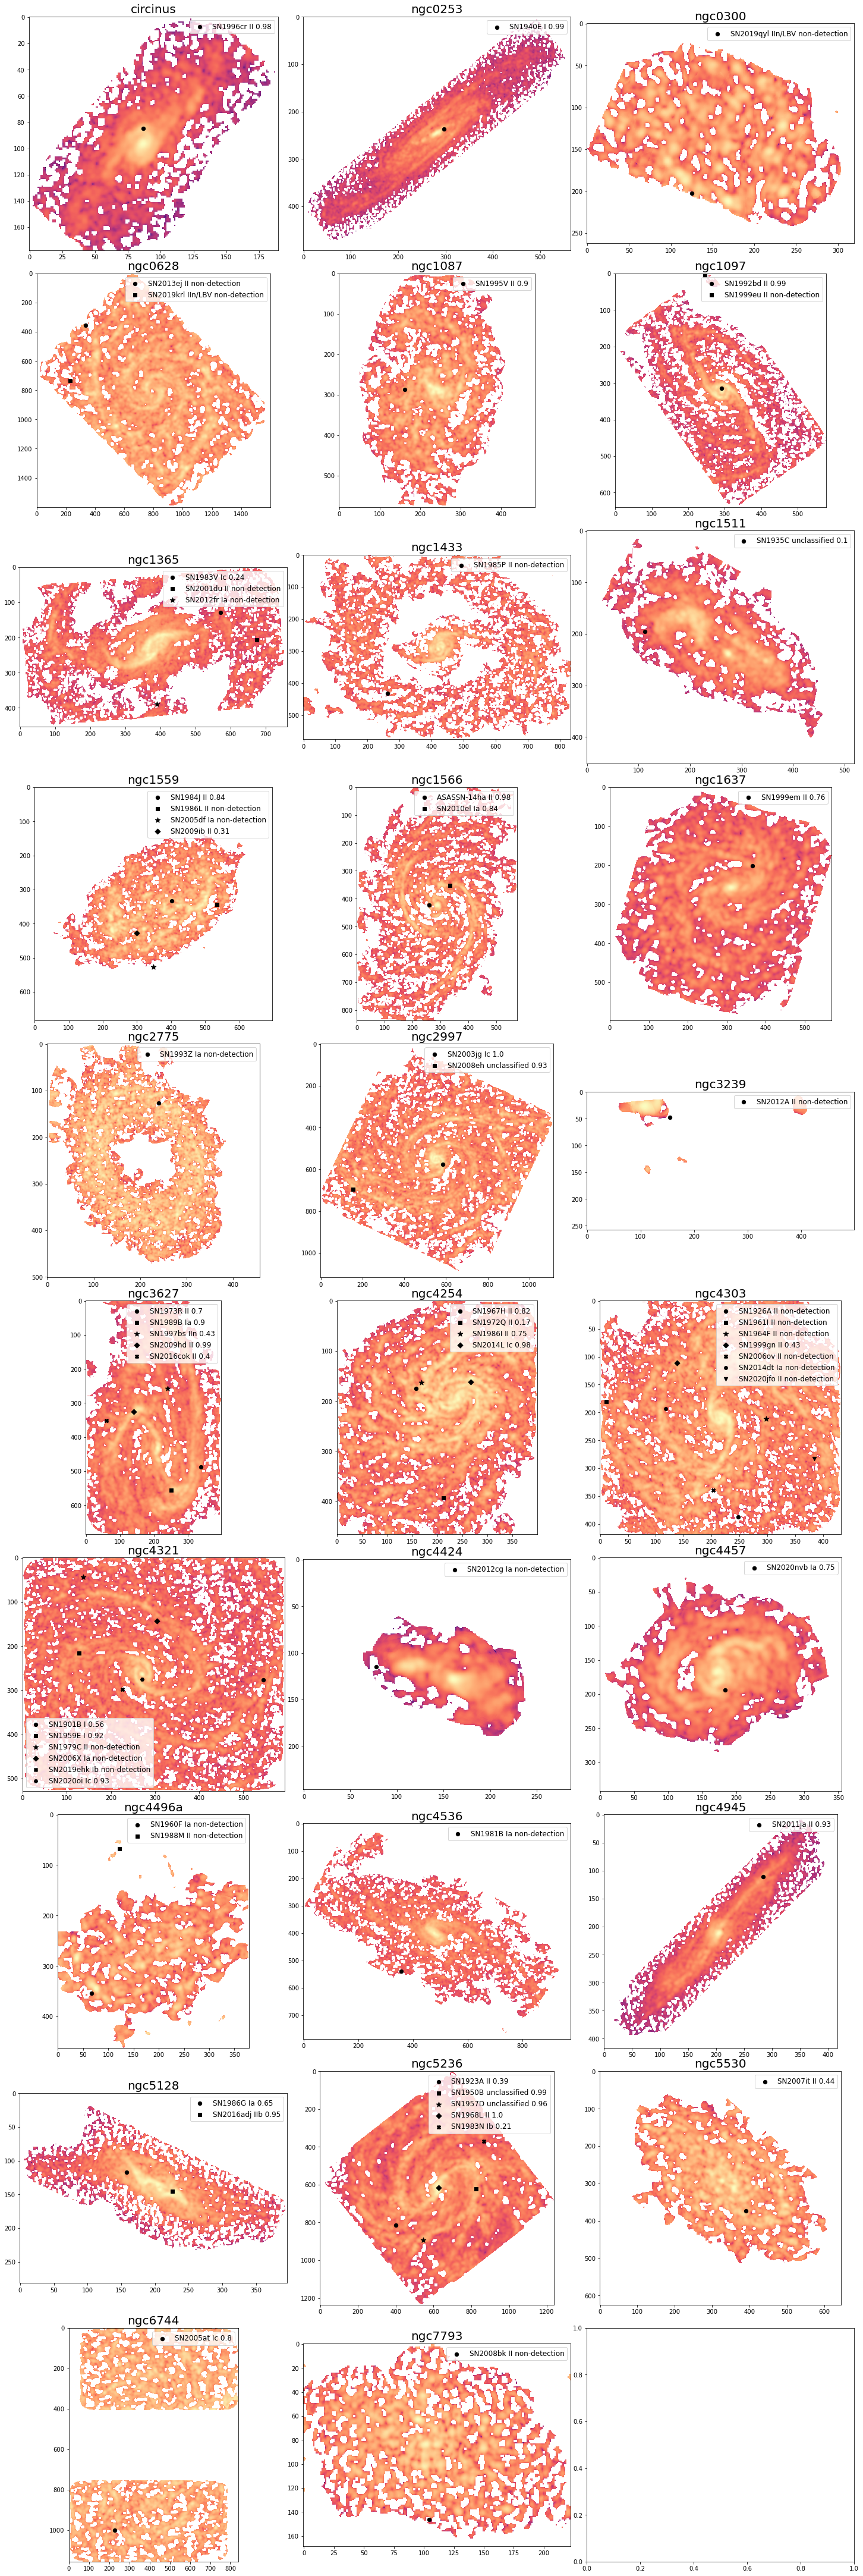

In [280]:
markerShapes = ["o", "s", "*", "D", "X", "H", "v"]
markerSizes  = [40,40,80,40,40,40,40]

import math
i,j,m=0,0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(plots)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))
for plot in plots:
    xArr, yArr = wcss[m].wcs_world2pix(ras[m],decs[m],0)
    logplot = np.log10(plot)
    axs[i][j].imshow(logplot, cmap="magma")
    
    for n in range(len(decs[m])):
        axs[i][j].scatter(xArr[n], yArr[n], color = "black", marker = markerShapes[n], s = markerSizes[n], label = legendLabels[m][n])
    
    axs[i][j].set_title(gals[m][0], fontsize=20)
    axs[i][j].legend(loc="best", fontsize=12)
#     axs[i][j].tick_labels.hide()
#     axs[i][j].ticks.hide()
#     axs[i][j].axis_labels.hide()
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    m +=1
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/AllSNeInGalaxies.png", dpi=300)
   



In [252]:
print(name)
print(types)
print(percentiles)

[['SN1996cr'], ['SN1940E'], ['SN2019qyl'], ['SN2013ej', 'SN2019krl'], ['SN1995V'], ['SN1992bd', 'SN1999eu'], ['SN1983V', 'SN2001du', 'SN2012fr'], ['SN1985P'], ['SN1935C'], ['SN1984J', 'SN1986L', 'SN2005df', 'SN2009ib'], ['ASASSN-14ha', 'SN2010el'], ['SN1999em'], ['SN1993Z'], ['SN2003jg', 'SN2008eh'], ['SN2012A'], ['SN1973R', 'SN1989B', 'SN1997bs', 'SN2009hd', 'SN2016cok'], ['SN1967H', 'SN1972Q', 'SN1986I', 'SN2014L'], ['SN1926A', 'SN1961I', 'SN1964F', 'SN1999gn', 'SN2006ov', 'SN2014dt', 'SN2020jfo'], ['SN1901B', 'SN1959E', 'SN1979C', 'SN2006X', 'SN2019ehk', 'SN2020oi'], ['SN2012cg'], ['SN2020nvb'], ['SN1960F', 'SN1988M'], ['SN1981B'], ['SN2011ja'], ['SN1986G', 'SN2016adj'], ['SN1923A', 'SN1950B', 'SN1957D', 'SN1968L', 'SN1983N'], ['SN2007it'], ['SN2005at'], ['SN2008bk']]
[['II'], ['I'], ['IIn/LBV'], ['II', 'IIn/LBV'], ['II'], ['II', 'II'], ['Ic', 'II', 'Ia'], ['II'], ['unclassified'], ['II', 'II', 'Ia', 'II'], ['II', 'Ia'], ['II'], ['Ia'], ['Ic', 'unclassified'], ['II'], ['II', 'Ia', '

In [276]:
types = ['II', 'I', 'IIn/LBV', 'II', 'IIn/LBV', 'II', 'II', 'II', 'Ic', 'II', 'Ia', 'II', 'unclassified', 'II', 'II', 'Ia', 'II', 'II', 'Ia', 'II', 'Ia', 'Ic', 'unclassified', 'II', 'II', 'Ia', 'IIn', 'II', 'II', 'II', 'II', 'II', 'Ic', 'II', 'II', 'II', 'II', 'II', 'Ia', 'II', 'I', 'I', 'II', 'Ia', 'Ib', 'Ic', 'Ia', 'Ia', 'Ia', 'II', 'Ia', 'II', 'Ia', 'IIb', 'II', 'unclassified', 'unclassified', 'II', 'Ib', 'II', 'Ic', 'II', 'II']
percentiles = ['0.98', '0.99', 'non-detection', 'non-detection', 'non-detection', '0.9', '0.99', 'non-detection', '0.24', 'non-detection', 'non-detection', 'non-detection', '0.1', '0.84', 'non-detection', 'non-detection', '0.31', '0.98', '0.84', '0.76', 'non-detection', '1.0', '0.93', 'non-detection', '0.7', '0.9', '0.43', '0.99', '0.4', '0.82', '0.17', '0.75', '0.98', 'non-detection', 'non-detection', 'non-detection', '0.43', 'non-detection', 'non-detection', 'non-detection', '0.56', '0.92', 'non-detection', 'non-detection', 'non-detection', '0.93', 'non-detection', '0.75', 'non-detection', 'non-detection', 'non-detection', '0.93', '0.65', '0.95', '0.39', '0.99', '0.96', '1.0', '0.21', '0.44', '0.8', 'non-detection', 'non-detection']
tiles = []

for i in range(len(percentiles)):
    if percentiles[i] == "non-detection":
        tiles.append(0.0)
    else:
        tiles.append(percentiles[i])

Ias, IIs, SEs, UnC, IIn = [],[],[],[],[]     
for i in range(len(types)):
    if types[i] == "I" or types[i] == "unclassified":
        UnC.append(float(tiles[i]))
    elif types[i] == "Ia":
        Ias.append(float(tiles[i]))
    elif types[i] == "II":
        IIs.append(float(tiles[i]))
    elif types[i] == "Ib" or types[i] == "Ic" or types[i] == "IIb": 
        SEs.append(float(tiles[i]))
    else:
        IIn.append(float(tiles[i]))
        
print(len(percentiles))
print(len(Ias), len(IIs), len(SEs), len(IIn), len(UnC))
    


63
12 33 8 3 7


In [283]:
Ias = np.sort(Ias)
IIs = np.sort(IIs)
SEs = np.sort(SEs)
IIn = np.sort(IIn)
UnC = np.sort(UnC)

<AxesSubplot:ylabel='Count'>

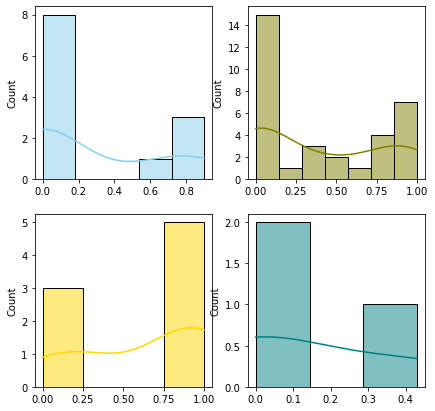

In [284]:
fig, axs = plt.subplots(2,2, figsize=(7,7))
#sns.histplot((Ias, IIs, SEs, UnC, IIn))

sns.histplot(data=Ias, kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=IIs, kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=SEs, kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=IIn, kde=True, color="teal", ax=axs[1, 1])

fig, axs = plt.subplots(2,2, figsize=(7,7))
#sns.histplot((Ias, IIs, SEs, UnC, IIn))

sns.histplot(data=Ias, kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=IIs, kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=SEs, kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=IIn, kde=True, color="teal", ax=axs[1, 1])

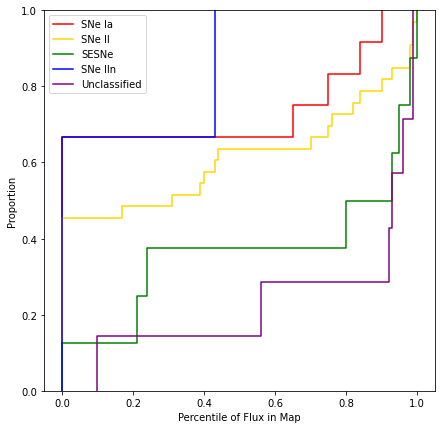

In [295]:
fig = plt.figure(figsize=(7,7))

sns.ecdfplot(data=Ias, color="red", label = "SNe Ia")
sns.ecdfplot(data=IIs, color="gold", label = "SNe II")
sns.ecdfplot(data=SEs, color="green", label = "SESNe")
sns.ecdfplot(data=IIn, color="blue", label = "SNe IIn")
sns.ecdfplot(data=UnC, color="purple", label = "Unclassified")
plt.xlabel("Percentile of Flux in Map")
plt.legend(loc="best")

In [296]:
print(UnC)

[0.1  0.56 0.92 0.93 0.96 0.99 0.99]
